In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(z):
    """
    Sigmoid function

    Parameters
    ----------
    z: (ndarray (m,)) or (scalar)
        m is the number of samples

    Returns
    -------
    (ndarray (m,)) or (scalar)
    """

    return 1 / (1 + np.exp(-z))


def f_wb(X, w, b):
    """
    Logistic regression model

    Parameters
    ----------
    X: (ndarray (m, n))
        m is the number of samples, n is the number of features
    w: (ndarray (n,))
    b: (scalar)

    Returns
    -------
    (ndarray (m,))
    """

    return sigmoid(np.dot(X, w) + b)

In [3]:
def compute_cost(X, y, w, b):
    """
    Compute cost

    Parameters
    ----------
    X: (ndarray (m, n))
        m is the number of samples, n is the number of features
    y: (ndarray (m,))
    w: (ndarray (n,))
    b: (scalar)

    Returns
    -------
    (scalar)
    """

    m = X.shape[0]
    y_hat = f_wb(X, w, b)
    cost = 1 / m * np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    return cost

In [4]:
def compute_gradient(X, y, w, b):
    """
    Compute the gradient for logistic regression

    Parameters
    ----------
    X: (ndarray (m, n))
        m is the number of samples, n is the number of features
    y: (ndarray (m,))
    w: (ndarray (n,))
    b: (scalar)

    Returns
    -------
    dj_dw: (ndarray (n,))
    dj_db: (scalar)
    """

    m = X.shape[0]
    y_hat = f_wb(X, w, b)
    dj_dw = 1 / m * np.dot(X.T, y_hat - y)
    dj_db = 1 / m * np.sum(y_hat - y)
    return dj_dw, dj_db

In [5]:
def perform_gradient_descent(X, y, w_init, b_init, alpha, epochs):
    """
    Perform gradient descent

    Parameters
    ----------
    X: (ndarray (m, n))
        m is the number of samples, n is the number of features
    y: (ndarray (m,))
    w_init: (ndarray (n,))
    b_init: (scalar)
    alpha: (float)
    epochs: (int)

    Returns
    -------
    w: (ndarray (n,))
    b: (scalar)
    """

    w = w_init
    b = b_init
    for i in range(epochs):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % 1000 == 0:
            print(f'Epoch {i + 1:4}, Cost: {float(compute_cost(X, y, w, b)):8.2f}')
    return w, b

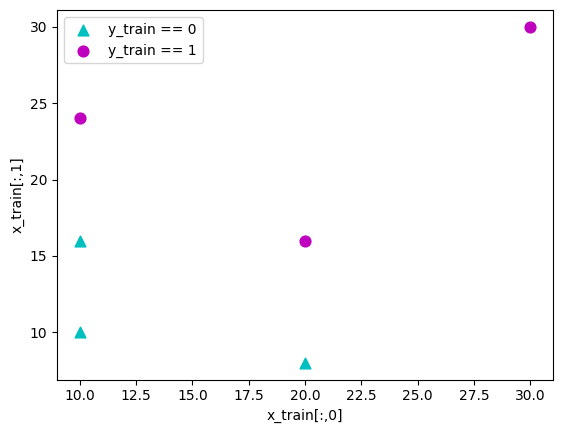

In [6]:
X_train = np.array([[10, 10], [10, 16], [20, 8], [10, 24], [20, 16], [30, 30]])
y_train = np.array([0, 0, 0, 1, 1, 1])

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 60, marker='^', c='c', label='y_train == 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 60, marker='o', c='m', label='y_train == 1')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')
plt.legend()

In [7]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2) - 0.5)
initial_b = -8
w, b = perform_gradient_descent(X_train, y_train, initial_w, initial_b, 0.001, 10000)
w, b

Epoch    1, Cost:     3.75
Epoch 1001, Cost:     0.17
Epoch 2001, Cost:     0.17
Epoch 3001, Cost:     0.17
Epoch 4001, Cost:     0.17
Epoch 5001, Cost:     0.17
Epoch 6001, Cost:     0.17
Epoch 7001, Cost:     0.17
Epoch 8001, Cost:     0.17
Epoch 9001, Cost:     0.17


(array([0.17254296, 0.36047453]), np.float64(-8.219025094555942))

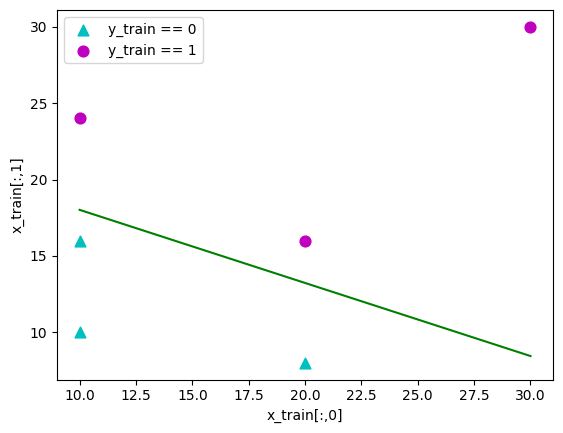

In [8]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 60, marker='^', c='c', label='y_train == 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 60, marker='o', c='m', label='y_train == 1')
plot_x = np.array([min(X_train[:, 0]), max(X_train[:, 0])])
plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
plt.plot(plot_x, plot_y, c='g')
plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')
plt.legend()

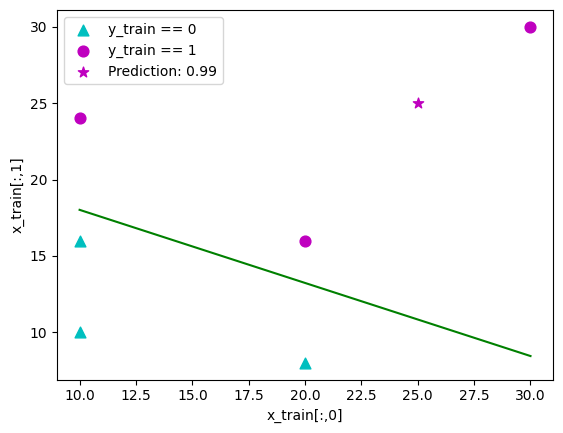

In [9]:
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], 60, marker='^', c='c', label='y_train == 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], 60, marker='o', c='m', label='y_train == 1')
plot_x = np.array([min(X_train[:, 0]), max(X_train[:, 0])])
plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
plt.plot(plot_x, plot_y, c='g')

x = np.array([25, 25])
y_hat = f_wb(x, w, b)
plt.scatter(x[0], x[1], 60, marker='*', c='m' if y_hat >= 0.5 else 'c', label=f'Prediction: {y_hat:.2f}')

plt.xlabel('x_train[:,0]')
plt.ylabel('x_train[:,1]')
plt.legend()